<a href="https://colab.research.google.com/github/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/main/Market_Classification_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Machine learning Experiments on Market Dataset

```
# Machine learning Experiments on Market Dataset includes:

1.   Decision Tree Classification
2.   SVC support Vector Machines Classifiers.
3.   Random Forest Classifier.
4.   Logistic Regressor Classifier.
5.   Accuracy Metrics for each above classifier.
6.   Confusion matrix for each above classifier.
7.   Different Classification metrics for each above classifier.
8.   ROC AUC plot for each above classifiers.

```








#import all the necessary librarie

In [1]:
# import all the necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
import pandas as pd

In [2]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the modified dataset from the google drive.

In [4]:
rfm = pd.read_csv('/content/drive/MyDrive/rfm.csv')

In [5]:
rfm

,Unnamed: 0,CustomerID,Amount,Frequency,Class,Recency,Cluster_Id,Cluster_brc
0,0,12357.0,18623.01,393,393,32,1,0
1,1,12367.0,168.90,11,11,3,0,1
2,2,12371.0,5663.88,189,189,44,0,2
3,3,12372.0,1298.04,52,52,71,0,1
4,4,12377.0,4884.36,231,231,314,2,1
...,...,...,...,...,...,...,...,...
241,245,16321.0,230.70,16,16,71,0,1
242,246,17404.0,30300.82,201,201,3,1,0
243,247,17443.0,1602.72,3,3,219,2,1
244,248,17444.0,8820.12,405,405,147,1,2


In [ ]:
rfm

#Assigning the X,y variables for training and testing.

In [6]:
##Assigning X,y variables for training and testing 
y=rfm['Cluster_Id'] 
# Class is considered because it is a combination of 
#Sector and company flourished during Covid-19 pandemic
X=rfm.drop('Class', axis=1)

In [7]:

X=rfm.drop('Unnamed: 0', axis=1)
X=rfm.drop('Cluster_Id', axis=1)
X.head()

,Unnamed: 0,CustomerID,Amount,Frequency,Class,Recency,Cluster_brc
0,0,12357.0,18623.01,393,393,32,0
1,1,12367.0,168.90,11,11,3,1
2,2,12371.0,5663.88,189,189,44,2
3,3,12372.0,1298.04,52,52,71,1
4,4,12377.0,4884.36,231,231,314,1


# Building Classification models.

In [8]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, roc_curve, \
    confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [9]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)

#Decision tree classification model

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

(172, 7)
(74, 7)

1st Classification Method: DecisionTreeClassifier
---------------------------------------------------


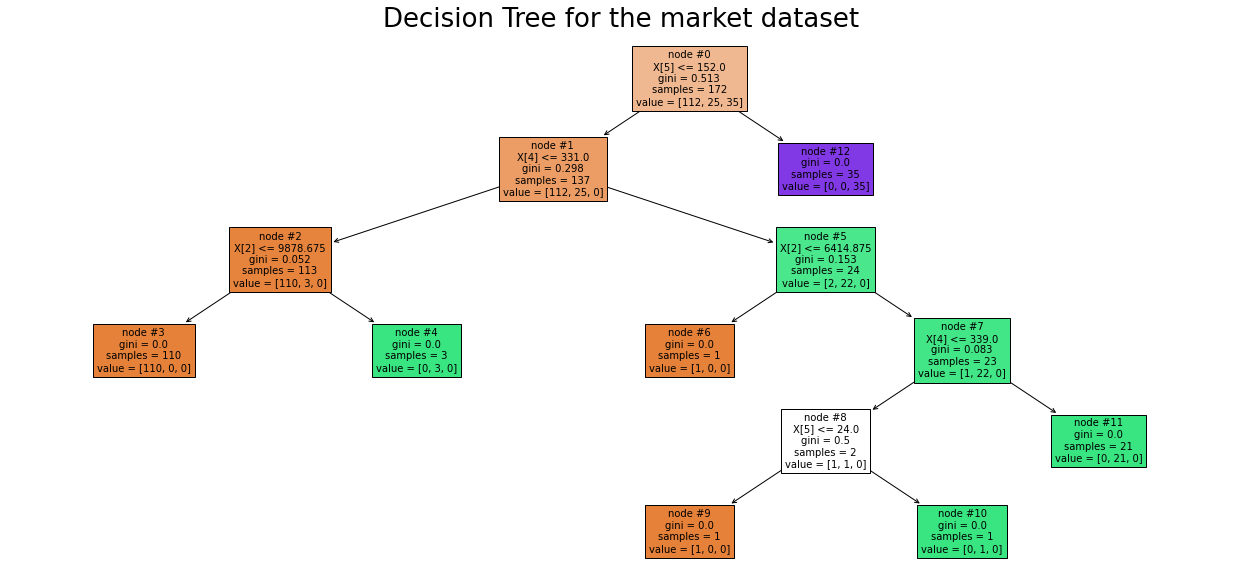

In [11]:
# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

# Implementing 1st classification method (DecisionTreeClassifier)
plt.figure(figsize=[22,10])
print("\n1st Classification Method: DecisionTreeClassifier")
print("---------------------------------------------------")
clf = DecisionTreeClassifier().fit(X_train,y_train)
plot_tree(clf, filled=True, fontsize=10,label='all', node_ids=True)
plt.title('Decision Tree for the market dataset', fontsize=26)
plt.show()

# K-fold cross-validation for K=10 for DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=0)
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
cross_val_decision = cross_val_score(decision_tree, X, y, cv=kfold, scoring='accuracy')



In [12]:
clf_decision = decision_tree.fit(X_train,y_train)
y_pred_decision = clf_decision.predict(X_test)
y_pred_decision_roc = clf_decision.predict_proba(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_decision))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_decision))
print("F1-Score: ", f1_score(y_test, y_pred_decision, average='micro'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_decision_roc, multi_class='ovr'))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_decision))

Accuracy: 0.972972972972973
Balanced Accuracy:  0.9878787878787879
F1-Score:  0.972972972972973
ROC AUC:  0.989177489177489
Confusion Matrix:
 [[53  2  0]
 [ 0  4  0]
 [ 0  0 15]]


# Support Vector Machines Classifier 

In [13]:
svc = SVC(kernel='rbf', random_state=0, probability=True)
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
cross_val_svc = cross_val_score(svc, X, y, cv=kfold, scoring='accuracy')

In [14]:
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
# Implementing 2nd classification method (SupportVectorClassifier)
print("\n2nd Classification Method: SupportVectorClassifier")
print("---------------------------------------------------")

# K-fold cross-validation for K=10 for SupportVectorClassifier
svc = SVC(kernel='rbf', random_state=0, probability=True)
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
cross_val_svc = cross_val_score(svc, X, y, cv=kfold, scoring='accuracy')

clf_svc = svc.fit(X_train,y_train)
y_pred_svc = clf_svc.predict(X_test)
y_pred_svc_roc = clf_svc.predict_proba(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_svc))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_svc))
print("F1-Score: ", f1_score(y_test, y_pred_svc, average='micro'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_svc_roc, multi_class='ovr'))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_svc))



2nd Classification Method: SupportVectorClassifier
---------------------------------------------------
Accuracy: 0.7972972972972973
Balanced Accuracy:  0.6666666666666666
F1-Score:  0.7972972972972974
ROC AUC:  0.9782697627479072
Confusion Matrix:
 [[55  0  0]
 [ 0  4  0]
 [14  1  0]]


# Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:

# Implementing 3rd classification method (RandomForestClassifier)
print("\n3rd Classification Method: RandomForestClassifier")
print("---------------------------------------------------")

# K-fold cross-validation for K=10 for RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=1, max_depth=5, random_state=0)
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
cross_val_randf = cross_val_score(rand_forest, X, y, cv=kfold, scoring='accuracy')

clf_rand_forest = rand_forest.fit(X_train,y_train)
y_pred_rand_forest = clf_rand_forest.predict(X_test)
y_pred_rand_forest_roc = clf_rand_forest.predict_proba(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_rand_forest))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_rand_forest))
print("F1-Score: ", f1_score(y_test, y_pred_rand_forest, average='micro'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_rand_forest_roc, multi_class='ovr'))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_rand_forest))


3rd Classification Method: RandomForestClassifier
---------------------------------------------------
Accuracy: 0.8918918918918919
Balanced Accuracy:  0.8742424242424242
F1-Score:  0.8918918918918919
ROC AUC:  0.9094630837494352
Confusion Matrix:
 [[48  2  5]
 [ 1  3  0]
 [ 0  0 15]]


# Logistic Regression model

In [18]:
from sklearn.linear_model import LogisticRegression

In [20]:
# Implementing 4th classification method (Logistic regression)
print("\n4th Classification Method: Logistic regression")
print("---------------------------------------------------")

# K-fold cross-validation for K=10 for Logistic regression
log_reg = LogisticRegression(solver='saga',random_state = 0, max_iter = 10000)
kfold = KFold(n_splits=10, random_state=0, shuffle=True)

cross_val_log_reg = cross_val_score(log_reg, X, y, cv=kfold, scoring='accuracy')
clf_log_reg = log_reg.fit(X_train,y_train)
y_pred_log_reg = clf_log_reg.predict(X_test)
y_pred_log_reg_roc = clf_log_reg.predict_proba(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_log_reg))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred_log_reg))
print("F1-Score: ", f1_score(y_test, y_pred_log_reg, average='micro'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_log_reg_roc, multi_class='ovr'))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_log_reg))



4th Classification Method: Logistic regression
---------------------------------------------------
Accuracy: 1.0
Balanced Accuracy:  1.0
F1-Score:  1.0
ROC AUC:  1.0
Confusion Matrix:
 [[55  0  0]
 [ 0  4  0]
 [ 0  0 15]]


In [21]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, roc_curve, \
    confusion_matrix, plot_roc_curve

#Accuracy metrics

In [22]:
 #Results of all the algorithms
clf_models = []

clf_models.append(("Decision Tree: ", DecisionTreeClassifier(max_depth=5, random_state=0)))
clf_models.append(("Support Vector Machine: ", SVC(kernel="rbf", random_state=0, probability=True)))
clf_models.append(("Random Forest: ", RandomForestClassifier(n_estimators=1, max_depth=5, random_state=0)))
clf_models.append(("Logistic Regression: ", LogisticRegression(solver='saga',random_state = 0, max_iter = 10000)))

print('\nClassification models results are...')
results = []
names = []
for name,model in clf_models:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_result = cross_val_score(model,X,y, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)


Classification models results are...
Decision Tree:  96.73333333333333
Support Vector Machine:  76.06666666666666
Random Forest:  87.80000000000001
Logistic Regression:  96.33333333333333


# ROC AUC plot

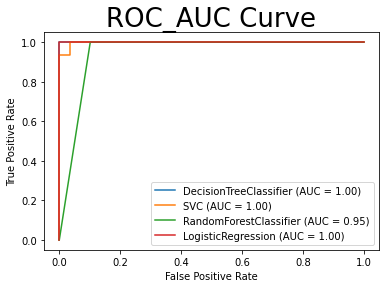

In [23]:
# Implementing ROC classifier
y=y==2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Implementing ROC Curve for DecisionTreeClassifier
ax = plt.gca()
decision_roc_curve = decision_tree.fit(X_train,y_train)
plot_roc_curve(decision_roc_curve, X_test, y_test, ax = ax)

# Implementing ROC Curve for SupportVectorClassifier
svc_roc_curve = svc.fit(X_train,y_train)
plot_roc_curve(svc_roc_curve, X_test, y_test, ax=ax)

#Implementing ROC Curve for RandomForestClassifier
rand_forest_roc_curve = rand_forest.fit(X_train,y_train)
plot_roc_curve(rand_forest_roc_curve, X_test, y_test, ax = ax)

# Implementing ROC Curve for Logistic Regression
log_reg_roc_curve = log_reg.fit(X_train,y_train)
plot_roc_curve(log_reg_roc_curve, X_test, y_test, ax=ax)
plt.title('ROC_AUC Curve', fontsize=26)
plt.show()

# Conclusion:
The cross-validation and metrics were exciting facts about the classifiers such as Decision tree classifier, SVC, Random Forest Classifier, and Logistic Regression classifier. There are four different visual plots for the confusion matrix. The most challenging part was the ROC AUC curve plotting due to the nature of the dataset is 'multiclass.' The final models created have satisfactory Accuracy and the AUC ROC curve. The best Classifier model in Supervised learning is the Decision tree Classifier with 96.67% accuracy and 100% AUC ROC(Area under the curve, Reciever Operating Characteristics).